In [14]:
import os
import pandas as pd

In [15]:
root = '/efs-shared/raw/tcga'
tfile=os.path.join(root,"cptac_transcriptomics.csv")
pfile=os.path.join(root,"cptac_proteomics.csv")
lfile=os.path.join(root,"cptac_samples.txt")

In [28]:
tdata = pd.read_csv(tfile)
pdata = pd.read_csv(pfile)
ldata = pd.read_csv(lfile, delimiter="\t")

In [17]:
pdata

,syntensor_id,C3N-04284,C3N-04283,C3N-04282,C3N-04162,C3N-04155,C3N-04127,C3N-04126,C3N-04124,C3N-04119,...,05CO003,05CO002,01CO022,01CO019,01CO015,01CO014,01CO013,01CO008,01CO006,01CO005
0,P_P04217,27.371825,29.001208,28.845881,-2.7905,-1.0048,-0.8863,28.447192,-3.9762,28.599178,...,-0.692,-1.1400,0.906,-0.311,-1.620,-0.523,-1.890,-1.200,-1.1200,-1.1000
1,P_P01023,28.600494,29.962177,29.265823,-3.7248,-3.0015,-3.3704,29.716579,-6.3093,29.236857,...,-0.438,-1.3700,1.450,-0.921,-0.976,-0.638,-0.329,-1.850,-0.3470,-0.4870
2,P_A8K2U0,21.582641,22.657078,22.606844,-0.2528,-3.6585,0.1607,24.402056,4.6037,22.872600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P_Q9NPC4,NaN,16.257520,NaN,0.1140,0.2553,NaN,14.997706,0.8419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P_Q9NRG9,23.022619,22.934959,22.945440,0.6384,0.2991,-0.7896,22.751309,-0.3056,22.647735,...,0.828,0.0167,0.359,0.226,0.522,0.289,0.670,0.119,-0.0029,0.0995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,P_Q14833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23311,P_P32243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23312,P_P48664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23313,P_P16471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
xdata = pd.DataFrame(pdata.columns[1:]).merge(ldata, how='inner', left_on=0,right_on='Sample ID')
xdata

,0,Patient ID,Sample ID,Cancer Type Detailed,year,cohort
0,C3N-04284,C3N-04284,C3N-04284,Pancreatic Adenocarcinoma,2021,paad
1,C3N-04283,C3N-04283,C3N-04283,Pancreatic Adenocarcinoma,2021,paad
2,C3N-04282,C3N-04282,C3N-04282,Pancreatic Adenocarcinoma,2021,paad
3,C3N-04162,C3N-04162,C3N-04162,Lung Adenocarcinoma,2021,lusc
4,C3N-04155,C3N-04155,C3N-04155,Lung Adenocarcinoma,2021,lusc
...,...,...,...,...,...,...
827,01CO014,01CO014,01CO014,Colon Adenocarcinoma,2019,coad
828,01CO013,01CO013,01CO013,Colon Adenocarcinoma,2019,coad
829,01CO008,01CO008,01CO008,Colon Adenocarcinoma,2019,coad
830,01CO006,01CO006,01CO006,Colon Adenocarcinoma,2019,coad


In [19]:
pdata_cohort=pdata.set_index('syntensor_id').T.merge(xdata[['Patient ID', 'cohort']],
                                        how='inner', right_on='Patient ID',
                                        left_index=True).T.drop('Patient ID').T


tdata_cohort=tdata.set_index('syntensor_id').T.merge(xdata[['Patient ID', 'cohort']],

                                        how='inner', right_on='Patient ID',

                                        left_index=True).T.drop('Patient ID').T

In [20]:
pdata_cohort.shape
tdata_cohort.shape

(644, 60813)

0


Text(0.5, 1.0, 'Percent of protein values that are NaN\n of stids (tissues) per tissue (stid)')

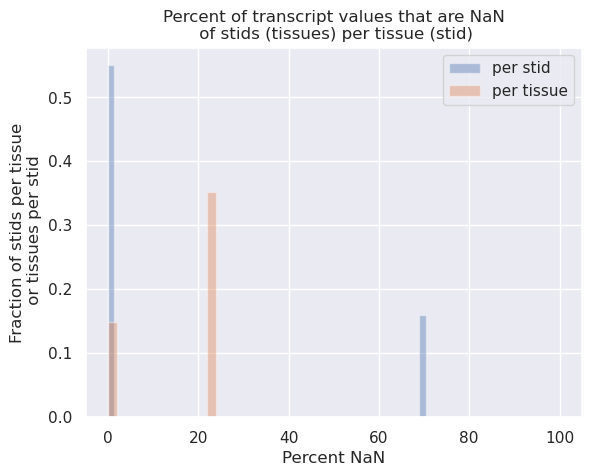

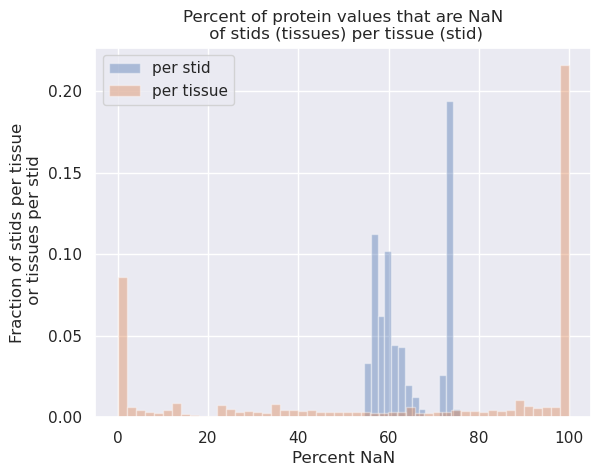

In [21]:
import matplotlib.pyplot as plt
print((~(pdata.columns==tdata.columns)).sum())
y,x = tdata.shape
plt.figure()
(tdata.isna().sum()/y*100.0).hist(bins=50, density=True, alpha=0.4)
(tdata.isna().sum(axis=1)/x*100.0).hist(bins=50, density=True, alpha=0.4)
plt.legend(['per stid', 'per tissue'])
plt.xlabel('Percent NaN')
plt.ylabel('Fraction of stids per tissue\n or tissues per stid')
plt.title('Percent of transcript values that are NaN\n of stids (tissues) per tissue (stid)')
y,x = pdata.shape
plt.figure()
(pdata.isna().sum()/y*100.0).hist(bins=50, density=True, alpha=0.4)
(pdata.isna().sum(axis=1)/x*100.0).hist(bins=50, density=True, alpha=0.4)
plt.legend(['per stid', 'per tissue'])
plt.xlabel('Percent NaN')
plt.ylabel('Fraction of stids per tissue\n or tissues per stid')
plt.title('Percent of protein values that are NaN\n of stids (tissues) per tissue (stid)')

In [22]:
import numpy as np
print(tdata.shape)
print(pdata.shape)
tdata_trimmed = tdata.replace(0, np.nan).dropna().set_index('syntensor_id').T
print(tdata_trimmed.shape)
pdata_trimmed = pdata.dropna().set_index('syntensor_id').T
print(pdata_trimmed.shape)

(60812, 833)
(23315, 833)
(832, 8826)
(832, 3285)


In [29]:
pdata = pdata.rename(columns={'syntensor_id': 'ensembl_id'}).set_index('ensembl_id')
pdata.index = pdata.index.map(lambda x: x.split('_')[1])

In [30]:
tdata = tdata.rename(columns={'syntensor_id': 'ensembl_id'}).set_index('ensembl_id')
tdata.index = tdata.index.map(lambda x: x.split('_')[1])

In [31]:
tdata.index.to_list()

['ENSG00000148584',
 'ENSG00000175899',
 'ENSG00000128274',
 'ENSG00000094914',
 'ENSG00000081760',
 'ENSG00000240602',
 'ENSG00000109576',
 'ENSG00000103591',
 'ENSG00000115977',
 'ENSG00000087884',
 'ENSG00000127837',
 'ENSG00000131043',
 'ENSG00000124608',
 'ENSG00000266967',
 'ENSG00000157426',
 'ENSG00000149313',
 'ENSG00000008311',
 'ENSG00000275700',
 'ENSG00000281376',
 'ENSG00000183044',
 'ENSG00000165029',
 'ENSG00000251595',
 'ENSG00000107331',
 'ENSG00000154265',
 'ENSG00000064687',
 'ENSG00000085563',
 'ENSG00000135776',
 'ENSG00000115657',
 'ENSG00000131269',
 'ENSG00000197150',
 'ENSG00000150967',
 'ENSG00000103222',
 'ENSG00000124574',
 'ENSG00000108846',
 'ENSG00000125257',
 'ENSG00000114770',
 'ENSG00000091262',
 'ENSG00000256340',
 'ENSG00000255277',
 'ENSG00000069431',
 'ENSG00000101986',
 'ENSG00000117528',
 'ENSG00000119688',
 'ENSG00000164163',
 'ENSG00000204574',
 'ENSG00000033050',
 'ENSG00000161204',
 'ENSG00000160179',
 'ENSG00000144827',
 'ENSG00000106077',


In [32]:
from pyensembl import EnsemblRelease

data = EnsemblRelease(86)

def get_gene_id(x):
    try:
        return data.gene_by_id(x)
    except ValueError as e:
        print(f"{x} not found in Ensembl")
        return None

In [33]:
from pybiomart import Server
server = Server(host='http://www.ensembl.org')
dataset = (server.marts['ENSEMBL_MART_ENSEMBL']
                 .datasets['hsapiens_gene_ensembl'])
print(dataset.filters.keys())
tpmap = dataset.query(attributes=[ 'ensembl_gene_id','gene_biotype','external_gene_name','uniprot_gn_symbol','uniprot_gn_id'],
              #filters={'link_ensembl_gene_id': tdata.index.to_list()[0]})
              #filters={'uniprot_gn_id': tdata.index.to_list()[0]})
             )

dict_keys(['link_so_mini_closure', 'link_go_closure', 'link_ensembl_transcript_stable_id', 'gene_id', 'transcript_id', 'link_ensembl_gene_id', 'chromosome_name', 'start', 'end', 'band_start', 'band_end', 'marker_start', 'marker_end', 'hsapiens_encode.type', 'strand', 'chromosomal_region', 'id_list_xrefs_filters', 'id_list_limit_xrefs_filters', 'id_list_microarray_filters', 'id_list_limit_microarray_filters', 'transcript_count_greater_than', 'transcript_count_less_than', 'biotype', 'transcript_biotype', 'source', 'transcript_source', 'transcript_tsl', 'transcript_gencode_basic', 'transcript_appris', 'transcript_is_canonical', 'mane_select', 'mane_plus_clinical', 'phenotype_description', 'phenotype_source', 'go_clos', 'go_name', 'go_evidence_code', 'homolog_filters', 'id_list_protein_domain_and_feature_filters', 'id_list_limit_protein_domain_filters', 'germ_line_variation_source', 'somatic_variation_source', 'with_validated_snp', 'so_consequence_name'])


In [34]:
tpmap = tpmap[tpmap["Gene type"]=='protein_coding']
tpmap

,Gene stable ID,Gene type,Gene name,UniProtKB Gene Name symbol,UniProtKB Gene Name ID
5,ENSG00000198888,protein_coding,MT-ND1,MT-ND1,P03886
6,ENSG00000198888,protein_coding,MT-ND1,ND1,U5Z754
10,ENSG00000198763,protein_coding,MT-ND2,MT-ND2,P03891
11,ENSG00000198763,protein_coding,MT-ND2,ND2,Q7GXY9
17,ENSG00000198804,protein_coding,MT-CO1,MT-CO1,P00395
...,...,...,...,...,...
141140,ENSG00000197312,protein_coding,DDI2,DDI2,Q5TDH0
141141,ENSG00000197312,protein_coding,DDI2,DDI2,H0YII4
141142,ENSG00000215695,protein_coding,RSC1A1,RSC1A1,Q92681
141144,ENSG00000116786,protein_coding,PLEKHM2,PLEKHM2,Q8IWE5


In [35]:
pdata.ensembl = pdata.index.map(lambda x: tpmap[tpmap['UniProtKB Gene Name ID'] == x]['Gene stable ID'])
tdata.ensembl = tdata.index.map(lambda x: tpmap[tpmap['Gene stable ID'] == x]['UniProtKB Gene Name ID'])

/tmp/ipykernel_1274204/2766089828.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pdata.ensembl = pdata.index.map(lambda x: tpmap[tpmap['UniProtKB Gene Name ID'] == x]['Gene stable ID'])
/tmp/ipykernel_1274204/2766089828.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tdata.ensembl = tdata.index.map(lambda x: tpmap[tpmap['Gene stable ID'] == x]['UniProtKB Gene Name ID'])


In [36]:
def clean(x):
    if len(x)==0:
        return None
    elif len(x)==1:
        return x.item()
    elif len(x) > 1:
        #print(x.tolist())
        return x.tolist()
#pdata.ensembl.map(clean)
proteins = tdata.ensembl.map(clean)

In [37]:
from collections import defaultdict
tpdict=defaultdict(list)
for t,p in zip(tdata.index, proteins):
    if isinstance(p,list):
        for pi in p:
            tpdict[pi].append(t)
    elif isinstance(p,str):
        tpdict[pi].append(t)
tpdict

defaultdict(list,
            {'Q9NQ94': ['ENSG00000148584'],
             'F8W9F8': ['ENSG00000148584'],
             'A0A024QZI9': ['ENSG00000148584'],
             'A0A024QZJ5': ['ENSG00000148584'],
             'A0A024QZM7': ['ENSG00000148584'],
             'P01023': ['ENSG00000175899'],
             'F5H1E8': ['ENSG00000175899'],
             'H0YFH1': ['ENSG00000175899'],
             'F8W7L3': ['ENSG00000175899'],
             'Q9NPC4': ['ENSG00000128274'],
             'A0A0S2Z5J1': ['ENSG00000128274'],
             'Q9NRG9': ['ENSG00000094914'],
             'F8VUB6': ['ENSG00000094914'],
             'F8VZ44': ['ENSG00000094914'],
             'H3BU82': ['ENSG00000094914'],
             'Q86V21': ['ENSG00000081760'],
             'E7EW25': ['ENSG00000081760'],
             'A0A024RBV2': ['ENSG00000081760'],
             'Q8N5Z0': ['ENSG00000109576'],
             'Q4W5N8': ['ENSG00000109576'],
             'D6RFY7': ['ENSG00000109576'],
             'D6REB9': ['ENSG000001095

In [38]:
def get_gene(x):
    genes = tpdict.get(x)
    if not genes:
        return genes
    if len(genes) > 1:
        for gene in genes:
            if gene in tdata.index:
                return gene
        raise Exception("no gene in tdata")
    elif len(genes) == 1:
        return genes[0]
    else:
        raise Exception("unknown value")
pddata=pdata
pddata.index=pdata.index.map(get_gene)

In [39]:
matches = [p for p in pddata.index if p in tdata.index]

In [40]:
tddata=tdata.T[set(matches)]

/tmp/ipykernel_1274204/943354564.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tddata=tdata.T[set(matches)]


In [41]:
tddata.shape

(832, 10694)

In [42]:
print(len(matches)/len(pddata))
print(len(set(matches))/len(matches))
print(len(set(matches)))

0.7826720995067553
0.5838996054362122
10655


In [45]:
#pddata = pddata[pddata.index.notnull()]
#pddata.to_csv("gene_mapped_proteins.csv")
#import pandas as pd
#pddata = pd.read_csv('gene_mapped_proteins.csv')
#pddata.set_index('ensembl_id')

In [166]:
import numpy as np
#np.save("protein_gene_dict.npz",tpdict)

In [48]:
import anndata
pcodedata = anndata.AnnData(tddata.fillna(0))
pcodedata.var['ensembl_id']=tddata.columns.tolist()
pcodedata

/shared/miniconda3/envs/geneformer/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 832 × 10694
    var: 'ensembl_id'

In [49]:
import loompy as lp
pcodedata.write_loom('pcode.loom', write_obsm_varm=True)
data = lp.connect('pcode.loom')
data.ca['n_counts']=tddata.T.sum(0).tolist() #Read counts per cell
print(data)
data.close()
#data

In [50]:
from geneformer.tokenizer import TranscriptomeTokenizer
tokenizer = TranscriptomeTokenizer()
tokenizer.tokenize_data('.','.','pcode')

Tokenizing pcode.loom
pcode.loom has no column attribute 'filter_pass'; tokenizing all cells.


Map:   0%|          | 0/832 [00:00<?, ? examples/s]

Map:   0%|          | 0/832 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/832 [00:00<?, ? examples/s]

In [11]:
import umap
reducer = umap.UMAP()

/shared/miniconda3/envs/multimodal/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/shared/miniconda3/envs/multimodal/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/shared/miniconda3/envs/multimodal/lib/python3.9/site-packages/umap/dist

In [12]:
mapper = reducer.fit(tdata.dropna().values[:,1:].T)

/shared/miniconda3/envs/multimodal/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


<Axes: >

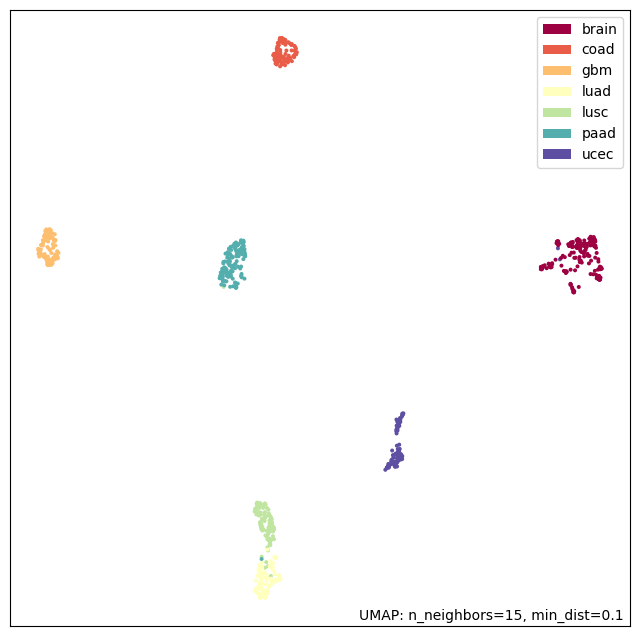

In [13]:
import umap.plot
umap.plot.points(mapper, labels=xdata.cohort)

In [15]:
pdata.

,syntensor_id,C3N-04284,C3N-04283,C3N-04282,C3N-04162,C3N-04155,C3N-04127,C3N-04126,C3N-04124,C3N-04119,...,05CO003,05CO002,01CO022,01CO019,01CO015,01CO014,01CO013,01CO008,01CO006,01CO005
0,P_P04217,27.371825,29.001208,28.845881,-2.7905,-1.0048,-0.8863,28.447192,-3.9762,28.599178,...,-0.692,-1.1400,0.906,-0.311,-1.620,-0.523,-1.890,-1.200,-1.1200,-1.1000
1,P_P01023,28.600494,29.962177,29.265823,-3.7248,-3.0015,-3.3704,29.716579,-6.3093,29.236857,...,-0.438,-1.3700,1.450,-0.921,-0.976,-0.638,-0.329,-1.850,-0.3470,-0.4870
2,P_A8K2U0,21.582641,22.657078,22.606844,-0.2528,-3.6585,0.1607,24.402056,4.6037,22.872600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P_Q9NPC4,NaN,16.257520,NaN,0.1140,0.2553,NaN,14.997706,0.8419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P_Q9NRG9,23.022619,22.934959,22.945440,0.6384,0.2991,-0.7896,22.751309,-0.3056,22.647735,...,0.828,0.0167,0.359,0.226,0.522,0.289,0.670,0.119,-0.0029,0.0995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,P_Q14833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23311,P_P32243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23312,P_P48664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23313,P_P16471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
cohorts = pdata_cohort['cohort'].unique()

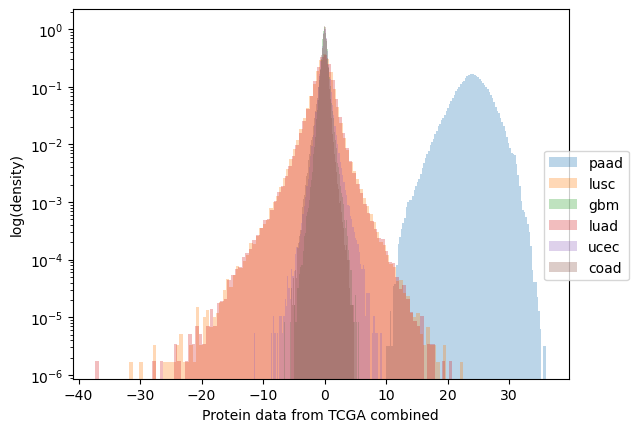

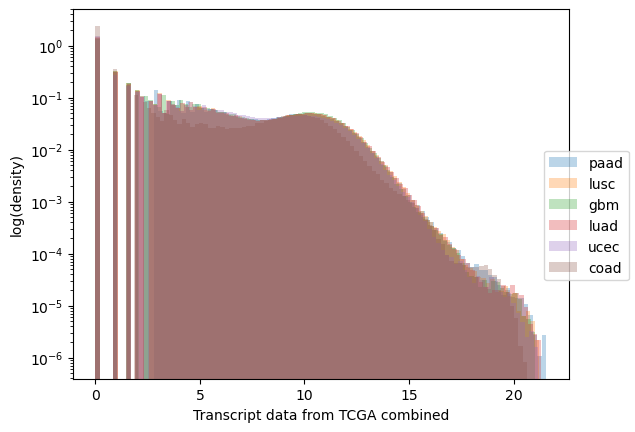

In [108]:
import matplotlib.pyplot as plt
fig=plt.figure(0)
for c in cohorts:
    data = pdata_cohort[pdata_cohort['cohort']==c].drop('cohort',axis=1)
    #print(c)
    plt.hist(data.stack(), bins=100, label=c, density=True, alpha=0.3)
fig.legend(loc='center right')
plt.yscale('log')
plt.xlabel('Protein data from TCGA combined')
plt.ylabel('log(density)')

fig=plt.figure(1)
for c in cohorts:
    data = tdata_cohort[tdata_cohort['cohort']==c].drop('cohort',axis=1)
    #print(c)
    plt.hist(data.stack(), bins=100, label=c, density=True, alpha=0.3)
fig.legend(loc='center right')
plt.yscale('log')
plt.xlabel('Transcript data from TCGA combined')
plt.ylabel('log(density)')

plt.show()
#plt.show()

In [1]:
ax = tdata_trimmed.stack().plot.hist(bins=50)

NameError: name 'tdata_trimmed' is not defined